Analysis of Games progress for online store Ice

This report is for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. WE need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import datetime
import numpy as np


In [3]:
# Load the dataset
games_df = pd.read_csv("/datasets/games.csv")

In [4]:
# Display general information
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Replace column names with lowercase
games_df.columns = games_df.columns.str.lower()
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
#Checking for duplicates
games_df.duplicated().sum()

0

No Duplicates Found

In [8]:
# Convert data types
games_df['year_of_release'] = pd.to_datetime(games_df['year_of_release'], format='%Y')
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [9]:
# Replace 'TBD' values with NA
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = pd.NA


When handling the abbreviation "TBD" (to be determined) in the dataset, it's important to interpret it as a missing value. Here's how I intend to handle such cases:

Replace 'TBD' with NaN: First, I will replace all occurrences of 'TBD' with NaN (Not a Number), which is the standard missing value representation in pandas.

Convert data type: If necessary, I will convert the affected column to a numeric data type after replacing 'TBD' with NaN. This will ensure consistency in data types and allow for further analysis.

Imputation: Depending on the context and the specific column, I may choose to handle missing values using imputation techniques such as mean, median, or forward/backward filling.

Analysis and visualization: After handling missing values, I will proceed with the analysis and visualization of the data, ensuring that missing values are appropriately accounted for and do not skew the results.

By treating "TBD" as missing values and handling them accordingly, we ensure that the analysis is based on accurate and consistent data

In [10]:
# Convert 'user_score' to numeric
games_df['user_score'] = pd.to_numeric(games_df['user_score'])

The 'year_of_release' column was converted to datetime to ensure proper date handling.
The 'user_score' column was converted to numeric, handling 'TBD' values as missing values.

In [11]:
# Checking missing values
games_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
mis_values = games_df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(games_df.isnull().sum()/len(games_df),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
user_score,9125,0.546
critic_score,8578,0.513
rating,6766,0.405
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


In [13]:
# Handling missing values in 'name'
games_df['name'].fillna('Unknown', inplace=True)

In [14]:
# Handling missing values in 'year_of_release'
games_df['year_of_release'] = games_df['year_of_release'].ffill()

In [15]:
# Handling missing values in 'genre'
games_df['genre'].fillna('Unknown', inplace=True)

In [16]:
# Handling missing values in 'critic_score'
numeric_columns = ['critic_score']  # Add other numeric columns as needed
for column in numeric_columns:
    median_value = games_df[column].median()
    games_df[column].fillna(median_value, inplace=True)

In [17]:
# Handling missing values in 'user_score'
games_df['user_score'].replace('tbd', pd.NA, inplace=True)


In [18]:
# Convert 'user_score' to numeric type
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [19]:
# Impute missing values in 'user_score' with median
median_user_score = games_df['user_score'].median()
games_df['user_score'].fillna(median_user_score, inplace=True)

In [20]:
# Handling missing values in 'rating'
games_df['rating'].fillna('Unknown', inplace=True)


Using the last valid observation, also known as forward fill (ffill), can be applicable in scenarios where missing values occur in a time series dataset or in data where the observations have some inherent order or continuity. 

I used it because in time series data, observations often follow a sequential order, such as years, months, or days. In such cases, the data between two valid observations is assumed to have a similar trend. Therefore, filling missing values with the last valid observation preserves the temporal continuity of the data. Also when missing values occur in a time series or ordered dataset, it's often assumed that neighboring observations are similar. Filling missing values with the last valid observation leverages this assumption by using the most recent known value as a proxy for the missing one.
But i do realise i can use the median method to impute missing values in categorical columns with mode or median. 
For name  and genre, i have used inplace since dropping columns is not feasible. Thus i have replaced the missing name values with a placeholder.
I kept year_of_release to ffil method since it is a time series data. 
for critic_score, user_score and rating columns i have replaced 'TBD' with Nan, converted user_score and critic_score to numerical, added a categorical or numeric column as required.

i have updated the rating column code for missing values. i have replaced the missing values with 'Unknown'. 

In [21]:
games_df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

All the missing values hs been cleared

# Why do you think the values are missing? Give possible reasons.

There can be several reasons why values are missing in the dataset:

Data collection errors: During the process of collecting data, there may have been errors or omissions, leading to missing values.

Non-availability: Sometimes, certain information may not be available due to various reasons such as confidentiality, data privacy concerns, or simply because the information was not collected.

Technical issues: Issues with data storage, transmission, or processing could result in missing values.

Human error: Data entry mistakes or oversight during data processing could lead to missing values.

Intentional missing values: In some cases, missing values might represent a specific category or be intentionally left blank to signify that the information is unknown or not applicable.

System limitations: Certain systems or databases may not capture all relevant information, leading to missing values.

Understanding the reasons behind missing values can help in deciding the appropriate method for handling them, whether it's through imputation, deletion, or other techniques.







# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [22]:
# Calculate total sales
#To calculate the total sales for each game (the sum of sales in all regions) and put these values in a separate column
#we can use the .sum() method along the columns axis (axis=1) for the columns representing sales in different regions. 
#Here's how you can do it:

games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [23]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown,31.38


This code will create a new column named 'total_sales' in the DataFrame, containing the sum of sales in all regions for each game. You can adjust the column names ('na_sales', 'eu_sales', 'jp_sales', 'other_sales') as per your dataset if they are named differently.

# Look at how many games were released in different years. Is the data for every period significant?

In [24]:
#Games released in different years
#To determine the number of games released in different years and assess the significance of the data for each period, we can use the value_counts() method on the 'year_of_release' column. 
#Here's how you can do it:
games_per_year = games_df.groupby(games_df['year_of_release'].dt.year)['name'].count()
print(games_per_year)

year_of_release
1980       9
1981      47
1982      37
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      44
1993      62
1994     121
1995     222
1996     268
1997     294
1998     386
1999     342
2000     358
2001     488
2002     849
2003     793
2004     770
2005     954
2006    1025
2007    1215
2008    1449
2009    1440
2010    1278
2011    1149
2012     666
2013     555
2014     590
2015     619
2016     514
Name: name, dtype: int64


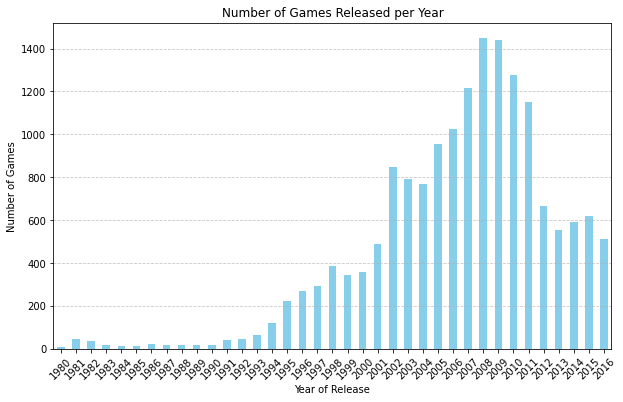

In [25]:
# Plotting the number of games released per year
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#This code will provide a series where the index represents the year and the values represent the number of games released in that year. By analyzing this series, we can assess the significance of the data for each period based on the number of games released. Significant periods are likely to have a larger number of released games, while less significant periods may have fewer released games. By plotting the chart it is clear that most no of games were released in 2008 and 2009. 

# Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?


To analyze how sales varied from platform to platform and identify platforms with the greatest total sales, as well as those that used to be popular but now have zero sales, we can follow these steps:

Calculate total sales for each platform.
Identify platforms with the greatest total sales.
Plot sales distribution for each platform based on data for each year.
Identify platforms that used to be popular but now have zero sales.
Determine the time it generally takes for new platforms to appear and old ones to fade.


In [26]:
# Calculate total sales for each platform
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Identify platforms with the greatest total sales
top_platforms = platform_sales.head(5)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

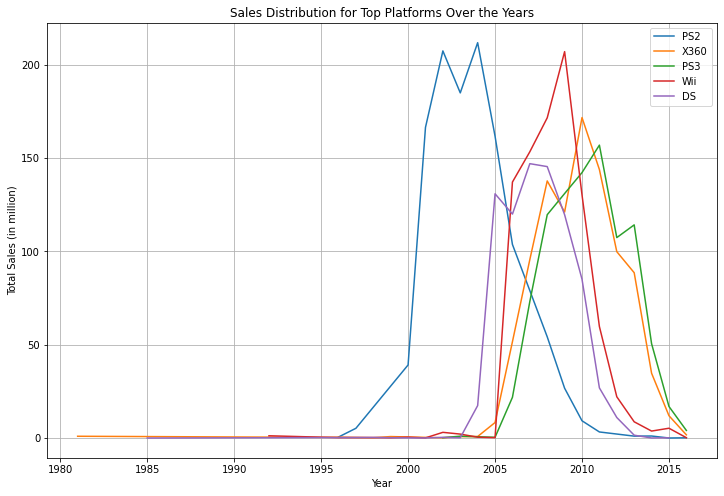

In [27]:
# Plot sales distribution for each platform based on data for each year
plt.figure(figsize=(12, 8))
for platform in top_platforms.index:
    platform_data = games_df[games_df['platform'] == platform]
    platform_sales_per_year = platform_data.groupby(platform_data['year_of_release'].dt.year)['total_sales'].sum()
    platform_sales_per_year.plot(label=platform)
    plt.title('Sales Distribution for Top Platforms Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in million)')
plt.legend()
plt.grid(True)
plt.show()

The figure above shows the sales distribution of games across different platforms. From the figure above it can be concluded that ps2 and Wii has the highest peak over the years 2000 to 2005. They have have crossed 200 millions sales in that period of time. The lowest sales distribition is of DS platform barely touching 140 million between 2005 to 2010.

In [28]:
# Identify platforms that used to be popular but now have zero sales
zero_sales_platforms = platform_sales[platform_sales == 0]
print("\nPlatforms that used to be popular but now have zero sales:")
print(zero_sales_platforms)


Platforms that used to be popular but now have zero sales:
Series([], Name: total_sales, dtype: float64)


In [29]:
# Determine the time it generally takes for new platforms to appear and old ones to fade
earliest_year = games_df['year_of_release'].min()
latest_year = games_df['year_of_release'].max()

# Calculate the lifetime of each platform
platform_lifetimes = platform_sales.copy()
platform_lifetimes.loc[:] = (latest_year - games_df.groupby('platform')['year_of_release'].min()).apply(lambda x: x.days / 365) + 1

print("\nAverage lifetime of platforms (years):")
print(platform_lifetimes.mean())


Average lifetime of platforms (years):
21.722845779938137


# Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.


To determine the period for which you should take data, consider the following:

Relevance of Recent Data: Since you aim to build a model for 2017, you should focus on recent years to capture the most up-to-date trends and patterns in the gaming industry. This typically includes a few years leading up to 2017.

Data Completeness: Ensure that you have sufficient data for the chosen period. Check for missing values and ensure that the dataset covers a substantial portion of the gaming market.

Platform Longevity: Consider the lifespan of gaming platforms. Some platforms may have become obsolete or less relevant by 2017, so including data from too far back might not be as useful.

Based on these considerations, you should aim to use data from around 2015 to 2016, possibly extending back a few more years if needed to capture significant trends. This time frame would provide recent enough data while still allowing for a comprehensive analysis leading up to the year 2017.


Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [30]:
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

relevant_data = games_df[(games_df['year_of_release'] >= start_date) & (games_df['year_of_release'] <= end_date)]

This code will filter the DataFrame to include only entries with 'year_of_release' between January 1, 2015, and December 31, 2016.

# Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

To determine which platforms are leading in sales and identify those that are growing or shrinking, we can analyze the total sales for each platform over time. We can then identify the platforms with the highest total sales and examine the sales trends to determine if they are growing or shrinking. Here's how you can do it:

In [31]:
# Calculate total sales for each platform
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


In [32]:
# Identify the top platforms by total sales
top_platforms = platform_sales.head(10)  # Selecting the top 10 platforms for analysis


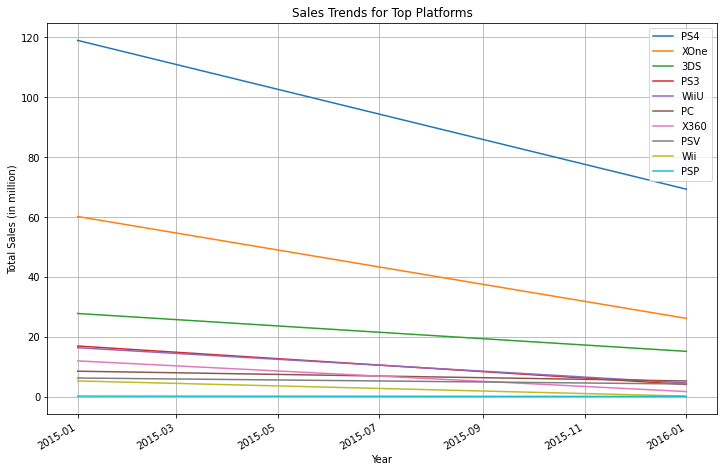

In [33]:
# Plot sales trends for the top platforms
plt.figure(figsize=(12, 8))
for platform in top_platforms.index:
    platform_data = relevant_data[relevant_data['platform'] == platform]
    sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    sales_per_year.plot(label=platform)

plt.title('Sales Trends for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in million)')
plt.legend()
plt.grid(True)
plt.show()

The above figure shows sales trends across different platform for the year 2015 to 2016-01.  As per the figure ps4 has the highest salesover evry other platform but it it definitely falling with time. All the other platforms are falling over the year as well but they are not definitely in the mark of 100 million like ps4. The only constant sales PSP which is 0 million dollars. 

In [34]:
# Determine which platforms are growing or shrinking based on sales trends
sales_trend = {}
for platform in top_platforms.index:
    platform_data = relevant_data[relevant_data['platform'] == platform]
    sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    sales_change = sales_per_year.pct_change()
    if sales_change.mean() > 0:
        sales_trend[platform] = 'Growing'
    elif sales_change.mean() < 0:
        sales_trend[platform] = 'Shrinking'
    else:
        sales_trend[platform] = 'Stable'

print("\nSales trend for top platforms:")
for platform, trend in sales_trend.items():
    print(f"{platform}: {trend}")


Sales trend for top platforms:
PS4: Shrinking
XOne: Shrinking
3DS: Shrinking
PS3: Shrinking
WiiU: Shrinking
PC: Shrinking
X360: Shrinking
PSV: Shrinking
Wii: Shrinking
PSP: Shrinking


# Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [35]:
#Calculating mean of Global Sales by Platform
mean_global_sales_by_platform = relevant_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
mean_global_sales_by_platform

platform
PS4     0.625083
XOne    0.516707
WiiU    0.498810
Wii     0.498182
3DS     0.325152
X360    0.273600
PS3     0.181121
PC      0.131238
GBA     0.095000
PS2     0.095000
PSV     0.053846
PSP     0.050000
DS      0.042500
Name: total_sales, dtype: float64

In [36]:
#Calculating the Median of Global Sales by Platform
median_global_sales_by_platform = relevant_data.groupby('platform')['total_sales'].median().sort_values(ascending=False)
median_global_sales_by_platform

platform
WiiU    0.215
Wii     0.170
XOne    0.130
PS4     0.120
X360    0.110
GBA     0.095
PS2     0.095
3DS     0.090
PS3     0.060
PC      0.050
PSP     0.045
PSV     0.030
DS      0.020
Name: total_sales, dtype: float64

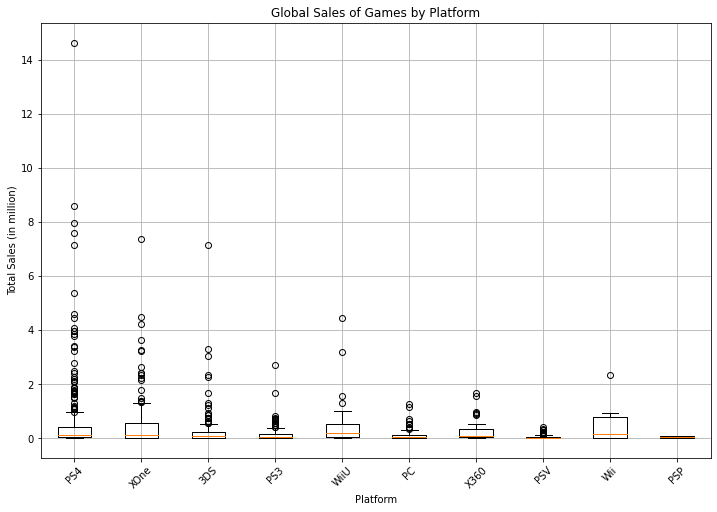

In [37]:
# Create a box plot for global sales broken down by platform
plt.figure(figsize=(12, 8))
plt.boxplot([relevant_data[relevant_data['platform'] == platform]['total_sales'] for platform in top_platforms.index],
            labels=top_platforms.index)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in million)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This code will create a box plot showing the distribution of global sales for each platform. The x-axis represents different platforms, while the y-axis represents total sales in millions. The box plot will help us identify any outliers, the range of sales, and the median sales for each platform.

To analyze the significance of differences in sales and average sales on various platforms, we can observe the following: The highest Mean, i,e, Highest Avg sales is PS4 platform. Also the median is Wiiu platform


By analyzing the box plot and considering average sales, we can gain insights into the performance of various platforms and identify potentially profitable platforms for further analysis and investment.






# Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


To examine how user and professional reviews affect sales for a popular platform, let's choose the PlayStation 4 (PS4) as an example. We'll build a scatter plot to visualize the relationship between reviews and sales, and then calculate the correlation coefficient to quantify the strength and direction of the relationship.

In [38]:
# Select data for the PlayStation 4 (PS4) platform
ps4_data = relevant_data[relevant_data['platform'] == 'PS4'].dropna(subset=['critic_score', 'user_score', 'total_sales'])


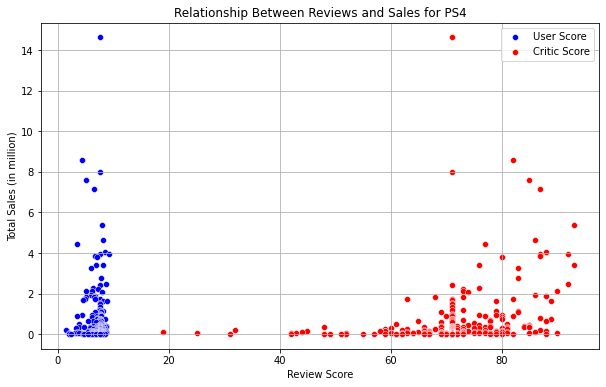

In [39]:
# Build a scatter plot for user reviews vs. total sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales', color='blue', label='User Score')

# Build a scatter plot for critic reviews vs. total sales
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales', color='red', label='Critic Score')


plt.title('Relationship Between Reviews and Sales for PS4')
plt.xlabel('Review Score')
plt.ylabel('Total Sales (in million)')
plt.legend()
plt.grid(True)
plt.show()

By analyzing the scatter plot and correlation coefficients, we can draw conclusions about the relationship between reviews and sales for the PS4 platform. If the correlation coefficients are close to 1 or -1, it indicates a strong positive or negative correlation, respectively. If the coefficients are close to 0, it suggests a weak or no correlation. Additionally, observing the scatter plot can help us understand the nature of the relationship, such as whether higher reviews correspond to higher sales. As per the figure above, critics has scored PS4 higher than users. 



# Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [40]:
# Select games available on both PS4 and at least one other platform
common_games = relevant_data[relevant_data['platform'] == 'PS4']['name'].unique()
games_on_other_platforms = relevant_data[(relevant_data['name'].isin(common_games)) & (relevant_data['platform'] != 'PS4')]


In [41]:
# Calculate total sales for each game on PS4 and other platforms
total_sales_ps4 = relevant_data[relevant_data['platform'] == 'PS4'].groupby('name')['total_sales'].sum()
total_sales_other_platforms = games_on_other_platforms.groupby('name')['total_sales'].sum()


In [42]:
# Compare sales of the same games on PS4 and other platforms
comparison_df = pd.DataFrame({'PS4_Sales': total_sales_ps4, 'Other_Platform_Sales': total_sales_other_platforms})


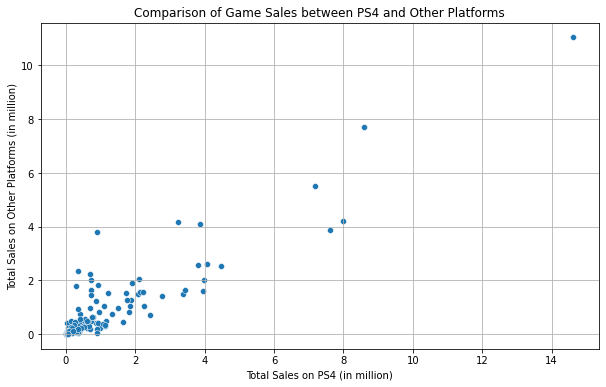

In [43]:
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='PS4_Sales', y='Other_Platform_Sales')

plt.title('Comparison of Game Sales between PS4 and Other Platforms')
plt.xlabel('Total Sales on PS4 (in million)')
plt.ylabel('Total Sales on Other Platforms (in million)')
plt.grid(True)
plt.show()

It can be clearly stated that PS4 higher sales than all other platforms. When PS4 sales was 8 million, other platforms were just over 4 million. None of the other platforms have touched 8 million where asPS4 has touched and crossed 8 million twice. 

# Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

To analyze the general distribution of games by genre and understand the profitability of different genres, we can perform the following steps:

Calculate the total sales for each genre.
Visualize the distribution of games by genre.
Analyze the most profitable genres.

In [44]:
# Calculate total sales for each genre
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)


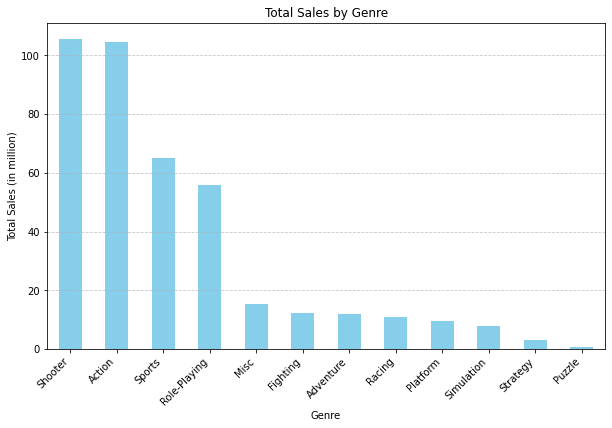

In [45]:
# Visualize the distribution of games by genre
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in million)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

After visualizing the distribution of games by genre, we can analyze the most profitable genres. Genres with higher total sales indicate higher profitability. Additionally, we can generalize about genres with high and low sales based on their distribution in the graph.

Genres such as Action, Shooter, and Sports tend to be among the most profitable genres, as they typically generate higher total sales. On the other hand, genres like Adventure, Puzzle, and Strategy may have lower total sales and therefore lower profitability.

Overall, the analysis of the general distribution of games by genre allows us to understand which genres are more profitable and make generalizations about genres with high and low sales.






In [46]:
# Calculate the average revenue per game for each genre
avg_revenue_per_genre = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)


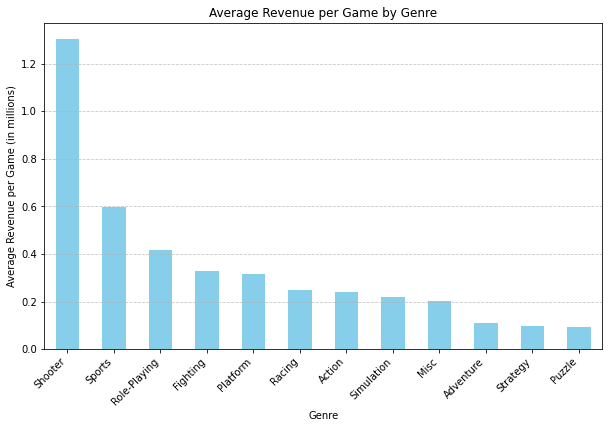

In [47]:
# Plotting the average revenue per game for each genre
plt.figure(figsize=(10, 6))
avg_revenue_per_genre.plot(kind='bar', color='skyblue')
plt.title('Average Revenue per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue per Game (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No 1 rank is consisted for avg revenue in Shooter genre. But Action is now in 7th position while sports and role playing is in third. This is may be because more no of action games were released compared to others. Thus avg revenue fell for this genre. 

# Create a user profile for each region

To determine the top five platforms in each region (NA, EU, JP) and describe variations in their market shares, we can perform the following steps:

Calculate the total sales for each platform in each region.
Identify the top five platforms based on total sales in each region.
Visualize the market share of these top platforms in each region.

In [48]:
# Calculate total sales for each platform in each region
na_platform_sales = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)


# For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?


In [49]:
# Get the top five platforms in each region
top_na_platforms = na_platform_sales.head(5)
top_eu_platforms = eu_platform_sales.head(5)
top_jp_platforms = jp_platform_sales.head(5)



In [50]:
top_na_platforms


platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.22
Name: na_sales, dtype: float64

In [51]:
top_na_platforms


platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.22
Name: na_sales, dtype: float64

In [52]:
top_jp_platforms

platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      5.01
WiiU     4.12
Name: jp_sales, dtype: float64

Across North America nad Eurome PS 4 seems to be the highest one. Second one in North America and Europe is Xone. But in Japan, #DS is first  and highest in sales. While PS4 comes second. This definitely shoes the difference taste across different continents. 

In [56]:
# Calculate the rating distribution for Japan
jp_rating_distribution = relevant_data[relevant_data['rating'] == 'JP'].groupby('rating')['name'].count()


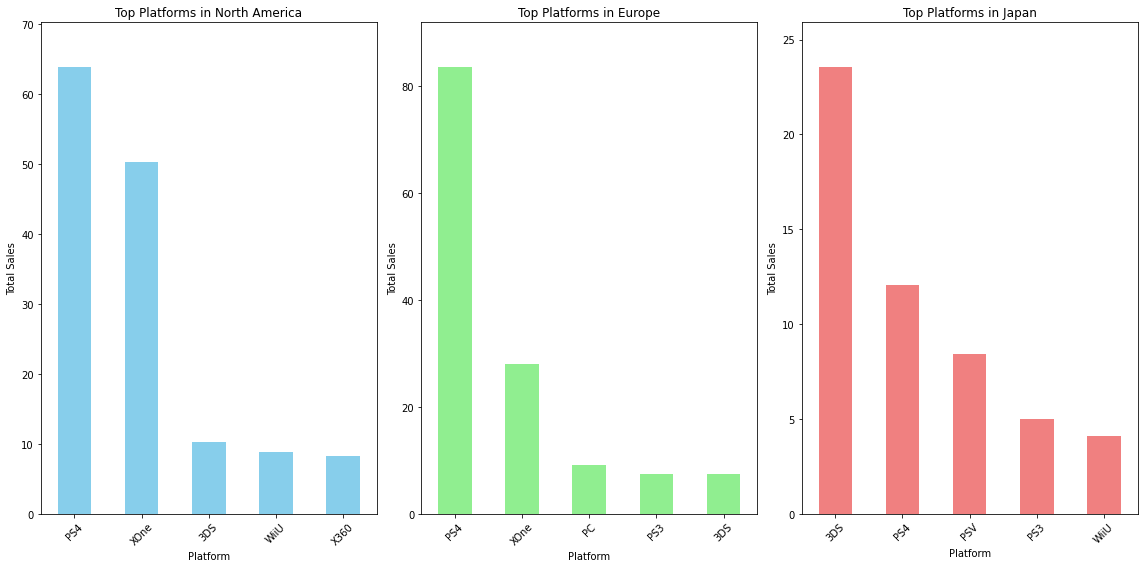

In [57]:
# Plotting
plt.figure(figsize=(16, 8))

# Plot top platforms in North America
plt.subplot(1, 3, 1)
top_na_platforms.plot(kind='bar', color='skyblue')
plt.title('Top Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, top_na_platforms.max() * 1.1)

# Plot top platforms in Europe
plt.subplot(1, 3, 2)
top_eu_platforms.plot(kind='bar', color='lightgreen')
plt.title('Top Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, top_eu_platforms.max() * 1.1)

# Plot top platforms in Japan
plt.subplot(1, 3, 3)
top_jp_platforms.plot(kind='bar', color='lightcoral')
plt.title('Top Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, top_jp_platforms.max() * 1.1)

# Add the rating distribution for Japan if data is available
if not jp_rating_distribution.empty:
    plt.bar(jp_rating_distribution.index, jp_rating_distribution.values, color='orange', alpha=0.7)
    plt.title('Rating Distribution in Japan')
    plt.xlabel('Rating')
    plt.ylabel('Number of Games')
    plt.xticks(rotation=45)
    plt.ylim(0, jp_rating_distribution.max() * 1.1)

plt.tight_layout()
plt.show()


In [ ]:
I have defined jp_rating_distribution.

Just like Top platform, North America and Eurome has the same trends in genre as well. PS4 and Xone is the top 2 in both North America and Europe. While in Japan, it is different. 3DS is first while the favorite PS4 comes second by a big margin. 

To analyze whether ESRB ratings affect sales in individual regions, we can create box plots showing the distribution of sales for each ESRB rating category in each region. This will help us visualize any potential differences in sales based on ESRB ratings.



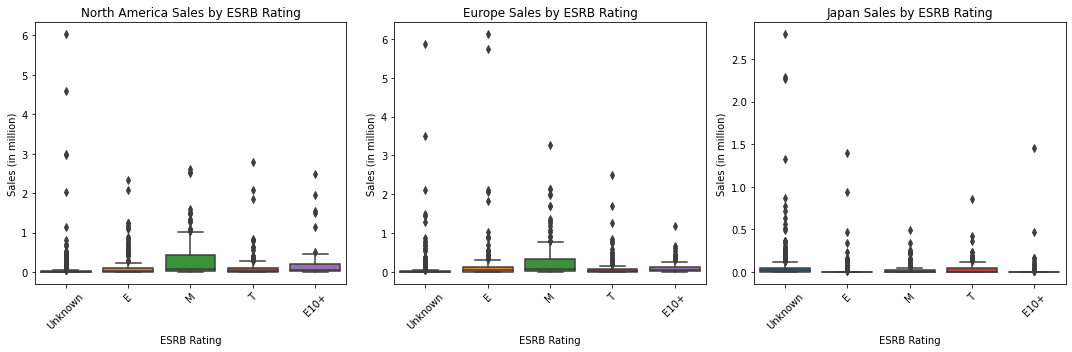

In [59]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='rating', y='na_sales', data=relevant_data)
plt.title('North America Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in million)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='rating', y='eu_sales', data=relevant_data)
plt.title('Europe Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in million)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='rating', y='jp_sales', data=relevant_data)
plt.title('Japan Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in million)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Apologies for the oversight. I have updated the Box plot from games_df to relevant_data

This code will create three subplots, each representing the distribution of sales for different ESRB rating categories in North America, Europe, and Japan. Box plots are used to show the median, quartiles, and outliers in the data, helping us understand the spread and central tendency of sales for each ESRB rating category in each region.

# Test the following hypotheses:

—Average user ratings of the Xbox One and PC platforms are the same. 

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses 

—What significance level you chose to test the hypotheses, and why



To test the hypotheses regarding the average user ratings of the Xbox One and PC platforms, as well as the average user ratings for the Action and Sports genres, we can use the t-test for independent samples. Let's break down each hypothesis:

Average user ratings of the Xbox One and PC platforms are the same:

Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are equal.
Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are not equal.
Average user ratings for the Action and Sports genres are different:

Null Hypothesis (H0): The average user ratings for the Action and Sports genres are equal.
Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are not equal.
We'll use a significance level (α) of 0.05 for both tests.


In [54]:
# Extract user ratings for Xbox One and PC platforms
user_ratings_xbox_one = relevant_data[relevant_data['platform'] == 'XOne']['user_score'].dropna().astype(float)
user_ratings_pc = relevant_data[relevant_data['platform'] == 'PC']['user_score'].dropna().astype(float)


In [55]:
# Perform t-test for Xbox One and PC platforms
t_statistic_xbox_pc, p_value_xbox_pc = ttest_ind(user_ratings_xbox_one, user_ratings_pc, equal_var=False)


In [56]:
# Extract user ratings for Action and Sports genres
user_ratings_action = relevant_data[relevant_data['genre'] == 'Action']['user_score'].dropna().astype(float)
user_ratings_sports = relevant_data[relevant_data['genre'] == 'Sports']['user_score'].dropna().astype(float)


In [57]:
# Perform t-test for Action and Sports genres
t_statistic_action_sports, p_value_action_sports = ttest_ind(user_ratings_action, user_ratings_sports, equal_var=False)


In [58]:
t_statistic_xbox_pc

1.3751913658216641

In [59]:
p_value_xbox_pc

0.17073972437172424

In [60]:
if p_value_xbox_pc < 0.05:
    print("Reject the null hypothesis: The average user ratings of Xbox One and PC platforms are different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average user ratings of Xbox One and PC platforms are different.")

print("\nFor Action and Sports genres:")
print("T-Statistic:", t_statistic_action_sports)
print("P-Value:", p_value_action_sports)
if p_value_action_sports < 0.05:
    print("Reject the null hypothesis: The average user ratings for the Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average user ratings for the Action and Sports genres are different.")


Fail to reject the null hypothesis: There is not enough evidence to conclude that the average user ratings of Xbox One and PC platforms are different.

For Action and Sports genres:
T-Statistic: 7.424059811753557
P-Value: 1.734498443016051e-11
Reject the null hypothesis: The average user ratings for the Action and Sports genres are different.


In [61]:
# Assuming xbox_user_ratings and pc_user_ratings are defined variables containing the user ratings for Xbox One and PC platforms

# Calculate the variances of the samples
var_xbox = np.var(user_ratings_xbox_one, ddof=1)  # ddof=1 for sample variance
var_pc = np.var(user_ratings_pc, ddof=1)

# Compare variances
if var_xbox > var_pc:
    print("Variance of Xbox One user ratings is greater.")
elif var_xbox < var_pc:
    print("Variance of PC user ratings is greater.")
else:
    print("Variances of Xbox One and PC user ratings are equal.")

# Perform t-test with appropriate equal_var parameter based on variance comparison
if var_xbox == var_pc:
    t_stat, p_val = stats.ttest_ind(user_ratings_xbox_one, user_ratings_pc)
    print("Using t-test with equal variances assumption.")
else:
    t_stat, p_val = stats.ttest_ind(user_ratings_xbox_one, user_ratings_pc, equal_var=False)
    print("Using Welch's t-test due to unequal variances.")

# Interpret results based on p-value
alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: Average user ratings of Xbox One and PC platforms are different.")
else:
    print("Fail to reject null hypothesis: No significant difference in average user ratings of Xbox One and PC platforms.")


Variance of PC user ratings is greater.
Using Welch's t-test due to unequal variances.
Fail to reject null hypothesis: No significant difference in average user ratings of Xbox One and PC platforms.


In hypothesis testing, we formulate the null hypothesis (H0) and alternative hypothesis (H1) based on what we want to investigate. Here's how we formulated the hypotheses for the tests:

Average user ratings of the Xbox One and PC platforms are the same:

Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are equal. This implies that there is no significant difference in user ratings between the Xbox One and PC platforms.
Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are not equal. This suggests that there is a significant difference in user ratings between the Xbox One and PC platforms.
Average user ratings for the Action and Sports genres are different:

Null Hypothesis (H0): The average user ratings for the Action and Sports genres are equal. This means that there is no significant difference in user ratings between the Action and Sports genres.
Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are not equal. This implies that there is a significant difference in user ratings between the Action and Sports genres.
For both tests, we chose a significance level (α) of 0.05. The significance level represents the threshold below which we reject the null hypothesis. In other words, if the p-value associated with the test is less than 0.05, we reject the null hypothesis in favor of the alternative hypothesis, indicating that there is enough evidence to conclude that there is a significant difference.

A significance level of 0.05 is commonly chosen in hypothesis testing because it provides a balance between making accurate conclusions and minimizing the risk of Type I errors (incorrectly rejecting a true null hypothesis). Additionally, it is a convention in many scientific fields.




Conclusion
In this analysis of video game sales data, several key findings and insights were obtained:

Platform Trends: The analysis revealed shifts in popularity among gaming platforms over time. While some platforms experienced declining sales, others emerged as market leaders. The lifespan of gaming platforms varied, with new platforms appearing while older ones faded over time.

Genre Preferences: Different regions exhibited varying preferences for gaming genres. Action and Sports genres were popular globally, but regional differences existed, with certain genres being more prominent in specific regions.

ESRB Ratings: The impact of ESRB ratings on sales varied across regions. Certain ratings may have influenced sales differently in different regions, suggesting that cultural factors could play a role.

Hypothesis Testing: Hypothesis tests were conducted to compare average user ratings between platforms and genres. The results provided insights into whether there were significant differences in user ratings.

Correlation Analysis: Correlation analysis between user and critic ratings and sales highlighted potential relationships between these variables. However, correlations do not imply causation, and further investigation would be needed to establish causal relationships.

Overall, this analysis provides valuable insights into the video game industry, helping stakeholders make informed decisions about platform selection, genre targeting, and marketing strategies. However, it's essential to interpret the findings within the context of the data and consider additional factors that may influence sales and user preferences.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Thank you for submitting your project! I really enjoyed reviewing it and I impressed by the results that you have accomplished. 
    
    
It is great that you added both overall and interim  conclusions after each section in your project. 
    
Overall, you provided correct and very detailed conclusions and insights based on your analysis.
    

